<a href="https://colab.research.google.com/github/NapsterZ4/qiskit_quantum_code/blob/master/proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Encabezado**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
pip install qiskit

In [ ]:
from qiskit import *
import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
IBMQ.save_account('')
%matplotlib inline

# **INTRODUCCION**

# Entrelazamiento cuantico

Cuando una particula tiene afectacion en la otra independientemente de la 

distancia
![Entrelazamiento cuantico](https://drive.google.com/uc?id=1DVcVOcX9pX0QrmehVG5lC3L_tP6-NRkz)

# Superpocicion de estados

Cuando 1 sola particula o mas puede estar en 2 estados en el mismo segmento de tiempo

![Superposicion cuantica](https://drive.google.com/uc?id=1IQXYWsdaSyeyK2r8pfvaZ0rzv1FC0iJ-)

Aqui es donde encontramos las desigualdades de Bell

![Desigualdades de Bell](https://drive.google.com/uc?id=1Og731gLrvK6qW3XWyhaH6VhaNqnt0bou)

Esfera de Bloch

![Esfera de Bloch](https://drive.google.com/uc?id=12lvevtpotg8K73o1O8MWUMp7QWdxhuqH)

![Esfera de Bloch 2](https://drive.google.com/uc?id=1lxCtifBxdydLHexFrQvdHBt_o1361Mcz)

# Teleportacion cuantica

Enviar informacion a distancia por un canal **clasico** sin que dos particulas interactuen

![Teleportacion cuantica](https://drive.google.com/uc?id=14JTEfZ2FFRllsQFkCcwiYZrXBAdNsgw7)

# Circuitos cuanticos
Esas transformaciones de estados se realizan a traves de circuitos cuanticos

![Circuitos cuanticos](https://drive.google.com/uc?id=175loASHXMIgsHApCQ7Tvg7iLl2VLzen1)

#Informacion sobre circuitos
![Informacion de circuitos](https://drive.google.com/uc?id=19J9lXzT1gYekDn0mnPEtbiJRyq3bpLwd)



# **Circuitos Cuanticos**

![Quantum Gates]('https://en.wikipedia.org/wiki/Quantum_logic_gate#/media/File:Quantum_Logic_Gates.png')

In [24]:
circuit  = QuantumCircuit(3, 3)
circuit.x(0)

circuit.barrier()

circuit.h(0)
circuit.cx(1,2)

circuit.barrier()

circuit.cx(0,1)
circuit.h(0)

circuit.measure([0,1], [0,1])

circuit.barrier()

circuit.measure([2], [2])

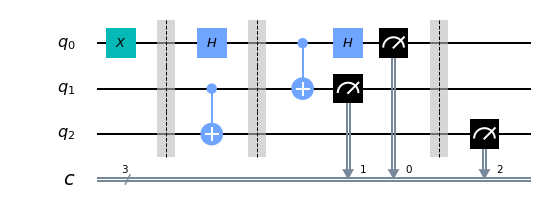

In [25]:
circuit.draw(output='mpl')

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
hist = execute(circuit, simulator, shots=1024)
result = hist.result().get_counts()

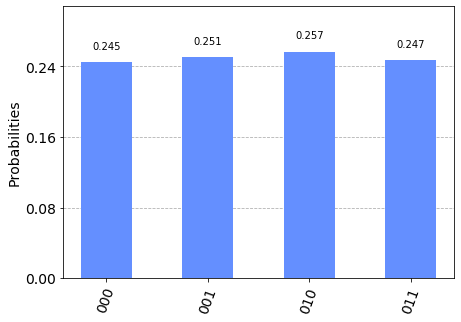

In [27]:
plot_histogram(result)

# **IBM Q Experience**

In [40]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmq_ourense')

Credentials are already in use. The existing account in the session will be replaced.


In [41]:
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
job_monitor(job)

5df82c1f1f82de0011d7543a
Job Status: job has successfully run


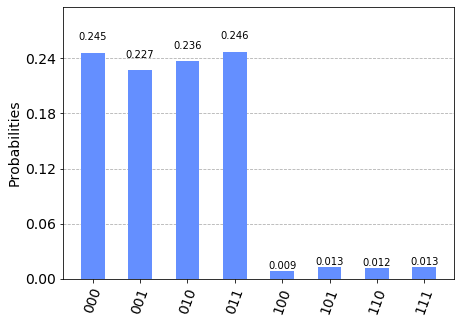

In [42]:
job_result = job.result()
plot_histogram(job_result.get_counts(circuit))

# **Conversiones**

In [32]:
analizer_states = job_result.get_counts(circuit)
print(analizer_states)

{'110': 5, '011': 325, '101': 6, '000': 246, '010': 209, '111': 7, '001': 222, '100': 4}


In [33]:
#Conversion de los valores del diccionario a valores a float
a = analizer_states
a = {k: v / total for total in (sum(a.values()),) for k, v in a.items()}
analizer_states = a

analizer_states

{'000': 0.240234375,
 '001': 0.216796875,
 '010': 0.2041015625,
 '011': 0.3173828125,
 '100': 0.00390625,
 '101': 0.005859375,
 '110': 0.0048828125,
 '111': 0.0068359375}

In [43]:
#Convertir a matriz
matrix_transition = np.array([list(analizer_states.values()) for item in analizer_states.values()])

#Extrayendo los estados
states = list(analizer_states.keys())

#Convertir a matrices de tipo 1D y 2D
matrix_transition = np.matrix(matrix_transition)

#Llenar matriz de estados

#Convirtiendo a float
matrix_transition = matrix_transition.astype(float)

print(matrix_transition)
print(states)

[[0.00488281 0.31738281 0.00585938 0.24023438 0.20410156 0.00683594
  0.21679688 0.00390625]
 [0.00488281 0.31738281 0.00585938 0.24023438 0.20410156 0.00683594
  0.21679688 0.00390625]
 [0.00488281 0.31738281 0.00585938 0.24023438 0.20410156 0.00683594
  0.21679688 0.00390625]
 [0.00488281 0.31738281 0.00585938 0.24023438 0.20410156 0.00683594
  0.21679688 0.00390625]
 [0.00488281 0.31738281 0.00585938 0.24023438 0.20410156 0.00683594
  0.21679688 0.00390625]
 [0.00488281 0.31738281 0.00585938 0.24023438 0.20410156 0.00683594
  0.21679688 0.00390625]
 [0.00488281 0.31738281 0.00585938 0.24023438 0.20410156 0.00683594
  0.21679688 0.00390625]
 [0.00488281 0.31738281 0.00585938 0.24023438 0.20410156 0.00683594
  0.21679688 0.00390625]]
['110', '011', '101', '000', '010', '111', '001', '100']


[[7.15594370e-03 2.19146658e-01 2.23043167e-04 2.40009022e-01
  2.43693940e-02 3.95691843e-04 2.93513696e-03 1.13458572e-03]
 [3.67862783e-03 2.44450875e-01 1.61487112e-02 1.36660323e-01
  1.62848768e-01 7.78880862e-03 3.52043088e-01 2.57538191e-03]
 [1.54680012e-03 1.29177522e-01 4.71864812e-03 1.14243397e+00
  4.59511047e-03 3.04760369e-02 3.59650387e-02 2.86410451e-03]
 [2.96459340e-03 7.55201526e-02 1.64403167e-02 4.78907510e-02
  2.10305796e-02 9.26348543e-04 1.24250748e-02 6.36644346e-03]
 [4.08428959e-03 8.90089637e-01 3.23427143e-02 1.81088756e-01
  2.34619440e-01 7.92678760e-03 2.41214889e-02 4.09510490e-03]
 [8.34510112e-05 9.84426398e-02 3.38228822e-04 1.89919664e-01
  1.53349060e-01 4.12076203e-03 1.50377946e-01 5.37004685e-03]
 [2.01701976e-03 6.68820143e-01 1.10345348e-03 5.08925669e-02
  1.21843359e-01 3.43665741e-02 3.03484678e-01 2.44192273e-03]
 [6.41779392e-03 7.68125488e-01 8.14385462e-04 1.49978905e-01
  1.43478108e-02 1.31031224e-03 1.44323480e-02 8.31866882e-04]]

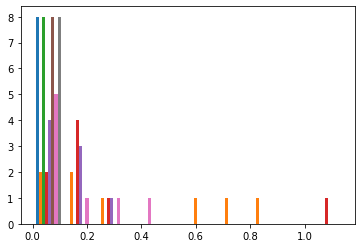

In [44]:
poisson = np.random.exponential(matrix_transition)
print(poisson)
print(np.mean(poisson))
plt.hist(poisson)
plt.show()

# **Cadenas de Markov**

In [ ]:
#Generador de estados
class MarkovChainStates(object):
  def __init__(self, transition_matrix, states):
    self.transition_matrix = transition_matrix
    self.states = list(transition_matrix.keys())

  def next_state(self, current_state):
    return np.random.choice(self.states, p=[self.transition_matrix[current_state][next_state] for next_state in self.states])
  
  def generate_states(self, current_state, no):
    future_states = []
    for i in range(no):
      next_state = self.next_state(current_state)
      future_states.append(next_state)
      current_state = next_state
    return future_states

In [ ]:
#Generador de probabilidades
class MarkovChainProbabilities(object):
  def __init__(self, transition_matrix, states, iterations):
    self.transition_matrix = transition_matrix
    self.states = states
    self.iterations = iterations
  
  def generate_probabilities(self, transition_matrix, states, iterations):
    states = self.states 
    for i in range(0, self.iterations):
      states = states * self.transition_matrix
      print(states)

In [47]:
#Analisis de Markov
mc = MarkovChainProbabilities(transition_matrix=poisson, states=np.matrix([[0,1,0,0,0,0,0,0]]), iterations = 10000)
mc.generate_probabilities(transition_matrix=matrix_transition, states=states, iterations = 10000)

[[0.00367863 0.24445087 0.01614871 0.13666032 0.16284877 0.00778881
  0.35204309 0.00257538]]
[[0.00274807 0.45611752 0.01193149 0.1085552  0.12517938 0.01594903
  0.20032311 0.00312053]]
[[0.00297451 0.37120797 0.01348493 0.11818305 0.13295105 0.01196438
  0.22861694 0.00299312]]
[[0.00278239 0.37677998 0.01256054 0.11094085 0.1239967  0.01237677
  0.20707444 0.00291986]]
[[0.00269815 0.35503971 0.01221375 0.10760277 0.12007937 0.0115755
  0.20221938 0.00279811]]
[[0.0025805  0.3425036  0.01167372 0.10292857 0.11482989 0.01119111
  0.1928215  0.00268748]]
[[0.00247771 0.32790977 0.01121148 0.09882783 0.11024751 0.01070632
  0.18529226 0.00257716]]
[[0.00237577 0.31470348 0.01074942 0.09476269 0.10571163 0.0102775
  0.17761669 0.00247218]]
[[0.00227897 0.30179239 0.01031172 0.09090168 0.10140421 0.00985511
  0.17039525 0.00237114]]
[[0.00218582 0.2894839  0.00989015 0.08718614 0.09725938 0.0094534
  0.16342552 0.00227432]]
[[0.00209657 0.27765493 0.00948633 0.08362605 0.09328794 0.0090